In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
data = pd.read_csv('BTC_ETS.csv')
# convert the date column to a datetime object
data["Date"] = pd.to_datetime(data["Date"])

# set the date column as the index
data.set_index("Date", inplace=True)
data

,Price
Date,
2018-01-01,13444.9
2018-01-02,14754.1
2018-01-03,15156.6
2018-01-04,15180.1
2018-01-05,16954.8
...,...
2023-04-23,27591.4
2023-04-24,27509.3
2023-04-25,28298.8


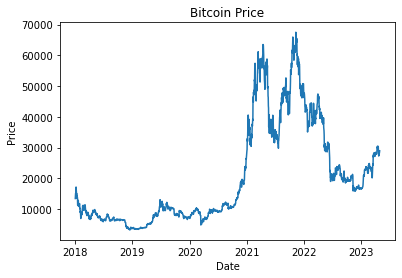

In [3]:
# Plot the time series
plt.plot(data)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price')
plt.show()

In [4]:
# split the time series into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:]

In [5]:
# fit the ETS model on the training set
model = ExponentialSmoothing(train, seasonal_periods=365, trend='add', seasonal='add')
fit = model.fit()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [6]:
# make predictions on the test set
preds = fit.forecast(len(test))

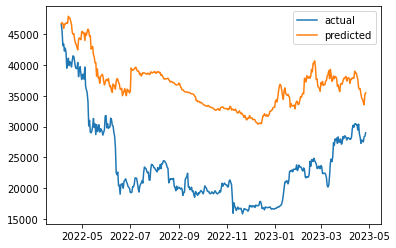

In [7]:
# plot the actual values and the predicted values
plt.plot(test.index, test.values, label='actual')
plt.plot(test.index, preds, label='predicted')
plt.legend()
plt.show()

In [8]:
# calculate the RMSE
rmse = np.sqrt(np.mean((test.Price - preds)**2))
print("RMSE:", rmse)

# calculate the MAPE
mape = np.mean(np.abs((test.Price - preds) / test.Price)) * 100
print("MAPE:", mape)

# calculate the MAE
mae = np.mean(np.abs(test.Price - preds))
print("MAE:", mae)

RMSE: 13477.103137527949
MAPE: 60.73373271141496
MAE: 12894.518599574552
